Stat : 32.5, P-Value : 0.19622288836173518


C:\Users\김동현\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.3'` for same effect.
  warnings.warn(msg, FutureWarning)


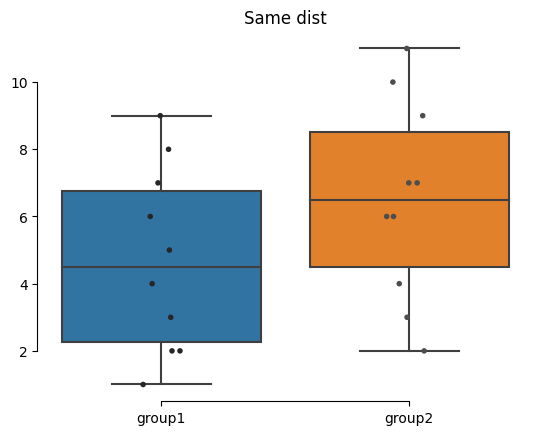

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

data = pd.DataFrame({
    "group1": [3, 2, 5, 1, 4, 2, 6, 7, 9, 8],
    "group2": [6, 4, 7, 2, 6, 3, 7, 9, 10, 11]
})
data.to_csv("Mann-Whitney-test_sample_data.csv", index=False)

stat, p_val = stats.mannwhitneyu(data['group1'],data['group2'])
print(f'Stat : {stat}, P-Value : {p_val}')

sns.boxplot(data=data[['group1','group2']])
sns.stripplot(data=data[['group1','group2']], color='.3', size=4)
sns.despine(trim=True)
plt.title('Same dist' if p_val > 0.05 else 'Diff dist')
plt.show()

In [2]:
# 등분산성을 검증하기 위한 Levene 테스트
stat, p_levene = stats.levene(data['group1'],data['group2'])
# P-Levene > 0.05 라는 말은 현재 선택된 데이터 샘플들이 등분산성조건을 만족한다는 뜻 (같은 분산임)
print(f'Levene 검정 P-Value : {p_levene}')

stat, p_val = stats.mannwhitneyu(data['group1'],data['group2'])
print(f'Stat : {stat}, P-Value : {p_val}')

Levene 검정 P-Value : 1.0
Stat : 32.5, P-Value : 0.19622288836173518


In [3]:
import numpy as np

group1 = data['group1'].to_numpy()
group2 = data['group2'].to_numpy()

total_group = np.concatenate((group1, group2))
print(total_group)
print(np.argsort(total_group))
stat, p_val = stats.mannwhitneyu(data['group1'], data['group2'])

print(f'Stat : {stat}, P-value : {p_val}')

[ 3  2  5  1  4  2  6  7  9  8  6  4  7  2  6  3  7  9 10 11]
[ 3  1  5 13  0 15  4 11  2  6 10 14  7 16 12  9  8 17 18 19]
Stat : 32.5, P-value : 0.19622288836173518
